# Assignment 12

## 1.复习上课内容

## 2.回答以下理论问题

### 2.1 请写一下TF-IDF的计算公式

$TermFrequency_{t, d}=\begin{cases}tf_{t,d}=count(t,d)\\tf_{t,d}=log_{10}{(count(t,d)+1)}\end{cases}$

Term Frequency指的是一个term在某个document中出现的次数，如果一个term出现次数越多，那么这个词就越重要（需要先去除停用词）。这个部分其实很简单，就是统计一个文档中的所有词语的词频，所谓Term Frequency就是词频。

上面是2个不同版本，其中log版本+1是为了避免出现count=0而使得tf=-∞的情况。

$InverseDocumentFrequency(IDF)_{t}=log_{10}{\frac{N}{n_{t}}}$
$其中N为语料库文档总数量，n_t为在语料库中所有出现过该term的文档的计数$

注意IDF的所需变量里没有d(document)，这意味着IDF在计算时其实和单篇文档是无关的，而与语料库和其中的token有关

IDF的理念，它其实是一个bouns项，如果一个词在别的文档中出现次数越少，说明这个词越能反映这篇文章的特点，理应获得更大的权值。所以IDF指的是一个term在所有文档中出现次数与文档总数的比值的倒数。加上log则是为了更平滑，在bouns非常大的情况下，参数不至于增长得太离谱。

**最后，TF-IDF的计算，实际上就是TF×IDF**

$w_{t,d} = TF_{t,d}\times{IDF_t}$

Note：TF-IDF实际上也是句子/文章表征的一种形式，是一种词袋模型(Bag-of-Words)，即不考虑词语之间的顺序关系，而是简单粗暴地把它们装进一个袋子里面，作为句子/文章的特征。

Sentence/Document:

**[word1, word2, word3, ... wordn]**

Representation:

**[tfidf1, tfidf2, tfidf3, ... tfidfn]**

**TFIDF的降维方法:**

1. 截取词库中频率最高的n个词，参考[sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)官方文档中的参数"max_features"：int or None (default=None). If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

2. PCA/t-SNE等降维算法

### 2.2 LDA算法的基本假设是什么？

LDA基本假设：

1. Per-document topic distributions：每一个文本所属的标题符合某种概率分布

  例如：金融类：0.3，政治：0.2，旅游：0.3，……
    
2. Per-topic word distributions：每一种主题下的词语也符合某种概率分布

  例如：
  
  金融下：“股市”0.2，“上涨”0.3，“游泳”0.0001，……
    
  旅游下：“股市”0.0001，“上涨”1e-4，“游泳”0.3，……

### 2.3 在TextRank算法中构建图的权重是如何得到的？

在Word2Vec还未出现时，可以用窗口中词语的Co-occurance次数来得到

有了Word2Vec后，词语之间可以用余弦相似度来得到

### 2.4 什么是命名实体识别？ 有什么应用场景？

对文本中的实体，比如人名，地名，公司命，国家等，进行识别。就是命名实体识别（Named Entity Recognition - NER）

应用有，

*构建知识图谱*，

*普通应用中，识别人名，地名，公司名*，

*生物学中，识别基因，蛋白质的名字*，

*教育学中，识别大学课程代码*

### 2.5 NLP主要有哪几类任务 ？

## 3.实践题

### 3.1 手动实现TextRank算法 (在新闻数据中随机提取100条新闻训练词向量和做做法测试）

 提示：
 1. 确定窗口，建立图链接。   
 2. 通过词向量相似度确定图上边的权重
 3. 根据公式实现算法迭代(d=0.85)

公式：$WS(V_i)=(1-d)+d*\sum_{j\in{In(V_i)}}{\frac{w_{ji}}{\sum_{V_k\in{Out(V_j)}}{w_{jk}}}WS(V_j)}$

**0) 读取数据和模型、预处理**

In [19]:
from gensim.models import Word2Vec
import pandas as pd

In [20]:
model = Word2Vec.load("C:/Users/yihua/学习/开课吧NLP_course/my/Project01/model/word2vec_v1.1.model")

In [21]:
df = pd.read_csv("C:/Users/yihua/学习/开课吧NLP_course/my/Project01/源资料/sqlResult_utf8.csv")

In [22]:
import random, json
import numpy as np

In [24]:
np.random.choice([1,2,3,4], size=2)

array([2, 1])

In [25]:
b = json.loads(df.to_json(orient='records'))

In [26]:
news_100 = np.random.choice([i["content"] for i in b if i["content"]!=None], size=100)

In [27]:
list(news_100)

['新华社照片，比尼亚德尔马（智利），2017年4月25日\\n（国际）（2）智利瓦尔帕莱索以西发生地震\\n4月24日，在智利瓦尔帕莱索省比尼亚德尔马，人们地震后在街上聚集。\\n据美国地质勘探局地震信息网消息，智利瓦尔帕莱索以西38公里处北京时间25日5时38分发生7.1级地震。\\n新华社发',
 '新华社照片，外代，2017年3月31日\\n（外代二线）花样滑冰——世锦赛双人滑：于小雨/张昊获第四\\n3月30日，中国选手于小雨（右）/张昊在双人滑自由滑比赛中。\\n当日，在芬兰赫尔辛基举行的2017年花样滑冰世锦赛双人滑比赛中，中国选手于小雨/张昊以211.51分的总成绩获得第四名。\\n新华社/欧新\\n',
 '新华社照片，外代，2017年6月1日\\n（外代二线）网球——法网：戈芬晋级第三轮\\n5月31日，比利时选手戈芬在比赛中回球。\\n当日，在法国巴黎举行的2017法国网球公开赛男子单打第二轮比赛中，比利时选手戈芬以3比1战胜乌克兰选手斯塔霍夫斯基，晋级第三轮。\\n新华社/欧新',
 '新华社照片，斯德哥尔摩，2017年4月8日\\n（国际）（4）斯德哥尔摩民众悼念卡车袭击事件遇难者\\n4月8日，在瑞典首都斯德哥尔摩，民众在卡车袭击事件发生地献花以悼念遇难者。\\n当地时间7日下午3时许，一辆被劫持的货运卡车高速冲向斯德哥尔摩市中心皇后大街上的人群，造成4人死亡，15人受伤，其中9人伤势严重。\\n新华社记者付一鸣摄\\n\\n',
 '新华社德黑兰６月４日电（记者穆东）伊朗４日在首都德黑兰南郊的霍梅尼陵举行伊朗伊斯兰革命领导者、精神领袖霍梅尼逝世２８周年纪念活动。\\n\u3000\u3000据伊朗国家电视台报道，伊朗最高领袖哈梅内伊在当天的纪念仪式上发表讲话，号召人民延续霍梅尼精神，不畏惧外来威胁。他还呼吁国际社会通过对话解决叙利亚冲突等地区事务。\\n\u3000\u3000哈梅内伊说，叙利亚、也门、巴林等国家的未来应该由人民决定，其他任何国家都无权干涉。他批评美国是中东地区冲突的幕后推手，“美国绝不是一个可靠的国家”。\\n\u3000\u3000１９７９年２月，伊朗宗教领袖霍梅尼领导的伊斯兰革命推翻了巴列维王朝，成立了伊朗伊斯兰共和国。当年１２月，伊朗举行公民投票通过新政权成立后的第一部宪法。根据宪法，伊朗实行政教合一、神权高于一

In [28]:
import jieba, re
from hanziconv import HanziConv

In [29]:
def get_stopwords(path='../../../Project01/content/stopwords.txt', punctuations=True, bookmarks=False, text_stopwords=True):
    '''
    加载停用词表，去掉一些噪声
    punctions是否作为停用词，是停用词为False（不保留），要保留在语料里为True
    bookmarks是否作为停用词，是停用词为False（不保留），要保留在语料里为True
    text_stopwords是否作为停用词，是停用词为False（不保留）, 要保留在语料里为True
    :return: 停用词集合
    '''
    # 加载停用词表
    stopword_set = set()
    with open(path, 'r', encoding="utf-8") as stopwords:  # stopwords.txt停用词表，我放在同一目录下
        for stopword in stopwords:
            stopword_set.add(stopword.strip("\n"))
#     stopword_set = [i.strip() for i in stopword_set]
    if punctuations == True: [stopword_set.remove(i) for i in ["！","!","，",",","。",".","：","；",";",":","？","?"]];
    if bookmarks == True: [stopword_set.remove(i) for i in ["《","》"]];
    # if text_stopwords == True: [stopword_set.remove(i) for i in set(["第二","一番","一直","一个","一些","许多","种","有的是","也就是说","末##末","啊","阿","哎","哎呀","哎哟","唉","俺","俺们","按","按照","吧","吧哒","把","罢了","被","本","本着","比","比方","比如","鄙人","彼","彼此","边","别","别的","别说","并","并且","不比","不成","不单","不但","不独","不管","不光","不过","不仅","不拘","不论","不怕","不然","不如","不特","不惟","不问","不只","朝","朝着","趁","趁着","乘","冲","除","除此之外","除非","除了","此","此间","此外","从","从而","打","待","但","但是","当","当着","到","得","的","的话","等","等等","地","第","叮咚","对","对于","多","多少","而","而况","而且","而是","而外","而言","而已","尔后","反过来","反过来说","反之","非但","非徒","否则","嘎","嘎登","该","赶","个","各","各个","各位","各种","各自","给","根据","跟","故","故此","固然","关于","管","归","果然","果真","过","哈","哈哈","呵","和","何","何处","何况","何时","嘿","哼","哼唷","呼哧","乎","哗","还是","还有","换句话说","换言之","或","或是","或者","极了","及","及其","及至","即","即便","即或","即令","即若","即使","几","几时","己","既","既然","既是","继而","加之","假如","假若","假使","鉴于","将","较","较之","叫","接着","结果","借","紧接着","进而","尽","尽管","经","经过","就","就是","就是说","据","具体地说","具体说来","开始","开外","靠","咳","可","可见","可是","可以","况且","啦","来","来着","离","例如","哩","连","连同","两者","了","临","另","另外","另一方面","论","嘛","吗","慢说","漫说","冒","么","每","每当","们","莫若","某","某个","某些","拿","哪","哪边","哪儿","哪个","哪里","哪年","哪怕","哪天","哪些","哪样","那","那边","那儿","那个","那会儿","那里","那么","那么些","那么样","那时","那些","那样","乃","乃至","呢","能","你","你们","您","宁","宁可","宁肯","宁愿","哦","呕","啪达","旁人","呸","凭","凭借","其","其次","其二","其他","其它","其一","其余","其中","起","起见","起见","岂但","恰恰相反","前后","前者","且","然而","然后","然则","让","人家","任","任何","任凭","如","如此","如果","如何","如其","如若","如上所述","若","若非","若是","啥","上下","尚且","设若","设使","甚而","甚么","甚至","省得","时候","什么","什么样","使得","是","是的","首先","谁","谁知","顺","顺着","似的","虽","虽然","虽说","虽则","随","随着","所","所以","他","他们","他人","它","它们","她","她们","倘","倘或","倘然","倘若","倘使","腾","替","通过","同","同时","哇","万一","往","望","为","为何","为了","为什么","为着","喂","嗡嗡","我","我们","呜","呜呼","乌乎","无论","无宁","毋宁","嘻","吓","相对而言","像","向","向着","嘘","呀","焉","沿","沿着","要","要不","要不然","要不是","要么","要是","也","也罢","也好","一","一般","一旦","一方面","一来","一切","一样","一则","依","依照","矣","以","以便","以及","以免","以至","以至于","以致","抑或","因","因此","因而","因为","哟","用","由","由此可见","由于","有","有的","有关","有些","又","于","于是","于是乎","与","与此同时","与否","与其","越是","云云","哉","再说","再者","在","在下","咱","咱们","则","怎","怎么","怎么办","怎么样","怎样","咋","照","照着","者","这","这边","这儿","这个","这会儿","这就是说","这里","这么","这么点儿","这么些","这么样","这时","这些","这样","正如","吱","之","之类","之所以","之一","只是","只限","只要","只有","至","至于","诸位","着","着呢","自","自从","自个儿","自各儿","自己","自家","自身","综上所述","总的来看","总的来说","总的说来","总而言之","总之","纵","纵令","纵然","纵使","遵照","作为","兮","呃","呗","咚","咦","喏","啐","喔唷","嗬","嗯","嗳"])];
    return stopword_set

def split_sentence(document):
    '''
    this is to split a doc into sentences
    分句之前先把\n，\r，\r\n，\u3000直接洗掉即可
    分句的规则有：1.碰到句号，问号，感叹号，分号还有空格就分，并把标点符号加到前句
    '''
    document = document.strip().replace("\r", "").replace("\n", "").replace("\\n", "").replace("\u3000", "").replace("\\", "")
    # 以结尾标点切分
    splitted = re.split(r"([？?。!！；…])", document)
    # 标点符号加回句子
    splitted.append("")
    splitted = ["".join(i) for i in zip(splitted[0::2],splitted[1::2])]
    return [i for i in splitted if i != '']


def wash_and_split(input_text, punctuations=False, bookmarks=False, text_stopwords=True, my_stopwords={}):
    '''
    主要的数据预处理函数
    输入一篇文章string
    输出分词分句并清洗后的句子列表，以备训练word2vec使用
    
    关于停用词见 get_stopwords 函数的注释
    '''
    if input_text.strip() == "": return [[""]]
    
    sentences = split_sentence(HanziConv.toSimplified(input_text))
    cutted = list(map(jieba.lcut, sentences))
    
    stopwds = get_stopwords(punctuations=punctuations, bookmarks=bookmarks, text_stopwords=text_stopwords)
    
    def remove_stopwords_for_each_sentence(list_of_words):
        return [word for word in list_of_words if word not in stopwds.union(" ").union(my_stopwords)]
    
    cutted = map(remove_stopwords_for_each_sentence, cutted)
    return [i for i in list(cutted) if i != []]

In [33]:
additional_stopwds = {"的", "在", "是", "了", "和", "与", "也", "将", "为", "等", "有", "以", "已", "从", "让" , "被", "还", "而", "时", "于", "内", "都", "其", "会", "到", "中", "上", "个", "又", "至", "向"}

In [34]:
news_100_splitted = [wash_and_split(news, my_stopwords=additional_stopwds) for news in news_100]

In [35]:
news_100_splitted[:]

[[['新华社',
   '照片',
   '比',
   '尼亚',
   '德尔',
   '马',
   '智利',
   '2017',
   '年',
   '4',
   '月',
   '25',
   '日',
   '国际',
   '2',
   '智利',
   '瓦尔帕莱索',
   '以西',
   '发生',
   '地震',
   '4',
   '月',
   '24',
   '日',
   '智利',
   '瓦尔帕莱索',
   '省比',
   '尼亚',
   '德尔',
   '马',
   '人们',
   '地震',
   '后',
   '街上',
   '聚集'],
  ['据',
   '美国',
   '地质勘探',
   '局',
   '地震',
   '信息网',
   '消息',
   '智利',
   '瓦尔帕莱索',
   '以西',
   '38',
   '公里',
   '处',
   '北京',
   '时间',
   '25',
   '日',
   '5',
   '38',
   '分',
   '发生',
   '7.1',
   '级',
   '地震'],
  ['新华社', '发']],
 [['新华社',
   '照片',
   '外代',
   '2017',
   '年',
   '3',
   '月',
   '31',
   '日',
   '外代',
   '二线',
   '花样滑冰',
   '世锦赛',
   '双人滑',
   '小雨',
   '张昊',
   '获',
   '第四',
   '3',
   '月',
   '30',
   '日',
   '中国',
   '选手',
   '小雨',
   '右',
   '张昊',
   '双人滑',
   '自由滑',
   '比赛'],
  ['当日',
   '芬兰',
   '赫尔辛基',
   '举行',
   '2017',
   '年',
   '花样滑冰',
   '世锦赛',
   '双人滑',
   '比赛',
   '中国',
   '选手',
   '小雨',
   '张昊以',
   '211.51',
   '分',
   '总成绩',
   '获得',
   '第四名'

In [36]:
from collections import Counter
counter = Counter([word for news in news_100_splitted for sent in news for word in sent])

In [37]:
counter.most_common(200)

[('月', 230),
 ('日', 194),
 ('新华社', 177),
 ('年', 141),
 ('中国', 115),
 ('记者', 86),
 ('4', 83),
 ('2017', 80),
 ('5', 80),
 ('他', 70),
 ('说', 65),
 ('发展', 62),
 ('孩子', 60),
 ('照片', 56),
 ('外代', 50),
 ('对', 50),
 ('就', 49),
 ('人', 47),
 ('国际', 45),
 ('养育', 45),
 ('不', 42),
 ('一个', 42),
 ('中心', 42),
 ('北京', 40),
 ('国家', 38),
 ('新', 38),
 ('世界', 38),
 ('美国', 37),
 ('要', 37),
 ('比赛', 36),
 ('可燃冰', 36),
 ('试采', 36),
 ('3', 33),
 ('摄', 33),
 ('这', 33),
 ('后', 32),
 ('当日', 32),
 ('但', 32),
 ('我', 32),
 ('进行', 32),
 ('我国', 32),
 ('比', 31),
 ('选手', 31),
 ('岁', 31),
 ('多', 31),
 ('合作', 31),
 ('问题', 30),
 ('医疗', 28),
 ('完', 27),
 ('他们', 27),
 ('研究', 27),
 ('2', 26),
 ('二线', 26),
 ('农村', 26),
 ('全球', 26),
 ('工作', 26),
 ('李德', 26),
 ('大发', 26),
 ('通过', 25),
 ('着', 25),
 ('下', 25),
 ('市场', 25),
 ('举行', 24),
 ('表示', 24),
 ('新闻', 24),
 ('自己', 24),
 ('认知', 24),
 ('航空', 24),
 ('日电', 23),
 ('经济', 23),
 ('成功', 23),
 ('俄罗斯', 23),
 ('仁', 23),
 ('做', 23),
 ('双方', 23),
 ('救护', 23),
 ('这是', 22),
 ('需要', 22),
 ('调

**1) 构建图**

使用OrderedDict字典来储存图

In [42]:
from collections import OrderedDict

def get_vocab(sentences):
    """Get all tokens"""
    vocab = OrderedDict()
    i = 0
    for sentence in sentences:
        for word in sentence:
            if word not in vocab:
                vocab[word] = i
                i += 1
    return vocab

In [50]:
v = get_vocab(news_100_splitted[0])

**2) 获取相连字对**

In [47]:
def get_token_pairs(sentences, window_size):
    """Build token_pairs from windows in sentences"""
    token_pairs = list()
    for sentence in sentences:
        for i, word in enumerate(sentence):
            for j in range(i+1, i+window_size):
                if j >= len(sentence):
                    break
                pair = (word, sentence[j])
                if pair not in token_pairs:
                    token_pairs.append(pair)
    return token_pairs

In [51]:
pairs = get_token_pairs(news_100_splitted[0], 3)

In [143]:
pairs

[('新华社', '照片'),
 ('新华社', '比'),
 ('照片', '比'),
 ('照片', '尼亚'),
 ('比', '尼亚'),
 ('比', '德尔'),
 ('尼亚', '德尔'),
 ('尼亚', '马'),
 ('德尔', '马'),
 ('德尔', '智利'),
 ('马', '智利'),
 ('马', '2017'),
 ('智利', '2017'),
 ('智利', '年'),
 ('2017', '年'),
 ('2017', '4'),
 ('年', '4'),
 ('年', '月'),
 ('4', '月'),
 ('4', '25'),
 ('月', '25'),
 ('月', '日'),
 ('25', '日'),
 ('25', '国际'),
 ('日', '国际'),
 ('日', '2'),
 ('国际', '2'),
 ('国际', '智利'),
 ('2', '智利'),
 ('2', '瓦尔帕莱索'),
 ('智利', '瓦尔帕莱索'),
 ('智利', '以西'),
 ('瓦尔帕莱索', '以西'),
 ('瓦尔帕莱索', '发生'),
 ('以西', '发生'),
 ('以西', '地震'),
 ('发生', '地震'),
 ('发生', '4'),
 ('地震', '4'),
 ('地震', '月'),
 ('4', '24'),
 ('月', '24'),
 ('24', '日'),
 ('24', '智利'),
 ('日', '智利'),
 ('日', '瓦尔帕莱索'),
 ('智利', '省比'),
 ('瓦尔帕莱索', '省比'),
 ('瓦尔帕莱索', '尼亚'),
 ('省比', '尼亚'),
 ('省比', '德尔'),
 ('德尔', '人们'),
 ('马', '人们'),
 ('马', '地震'),
 ('人们', '地震'),
 ('人们', '后'),
 ('地震', '后'),
 ('地震', '街上'),
 ('后', '街上'),
 ('后', '聚集'),
 ('街上', '聚集'),
 ('据', '美国'),
 ('据', '地质勘探'),
 ('美国', '地质勘探'),
 ('美国', '局'),
 ('地质勘探', '局'),
 ('地质勘探', '地震'),
 (

**3) 构建adjacency matrix**

In [95]:
# def symmetrize(a):
#     return a + a.T - np.diag(a.diagonal())*2

def get_matrix(vocab, token_pairs, model):
    """Get normalized matrix"""
    # Build matrix
    vocab_size = len(vocab)
    g = np.zeros((vocab_size, vocab_size), dtype='float')
    for word1, word2 in token_pairs:
        i, j = vocab[word1], vocab[word2]
        try:
            g[i][j] = model.wv.similarity(word1, word2)
            g[j][i] = g[i][j]
        except KeyError:
            g[i][j] = 0
            g[j][i] = 0
    
    # Get Symmeric matrix
    # g = symmetrize(g)

    # Normalize matrix by column
    norm = np.sum(g, axis=0)
    g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm

    return g_norm

In [96]:
matrix = get_matrix(v, pairs, model)

In [97]:
print(matrix)

[[0.         0.41152425 0.18528856 ... 0.         0.         1.        ]
 [0.41786774 0.         0.23701661 ... 0.         0.         0.        ]
 [0.17873474 0.22516234 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.30516399 0.        ]
 [0.         0.         0.         ... 0.25425003 0.         0.        ]
 [0.40339753 0.         0.         ... 0.         0.         0.        ]]


**4) 进行迭代算法，并封装函数：函数输入文本，返回关键词及其WS（PR）值**

In [121]:
def analyze(text, w2v_model, splitted = True, window_size=4, stopwords=additional_stopwds, min_diff = 1e-5, steps=50, d=0.85):
    """Main function to analyze text"""
    
    if splitted == False: text_splitted = wash_and_split(text, my_stopwords=stopwords)
    else: text_splitted = text

    # Build vocabulary
    vocab = get_vocab(text_splitted)

    # Get token_pairs from windows
    token_pairs = get_token_pairs(text_splitted, window_size)

    # Get normalized matrix
    g = get_matrix(vocab, token_pairs, model = w2v_model)

    # Initionlization for weight(pagerank value)
    pr = np.array([1] * len(vocab))

    # Iteration
    previous_pr = 0
    iter_times = 0
    for epoch in range(steps):
        pr = (1 - d) + d * np.dot(g, pr)
        if ((previous_pr - pr)**2).sum()  < min_diff:
            break
        else:
            previous_pr = pr
            #print("Current PR(WS): ", pr)
            iter_times+=1
    #print("===== 设置迭代次数：{}，实际迭代次数：{} =====".format(steps, iter_times))

    # Get weight for each node
    node_weight = dict()
    for word, index in vocab.items():
        node_weight[word] = pr[index]

    return node_weight

In [120]:
analyze(news_100_splitted[0], model, min_diff = 1e-10)

Current PR(WS):  [1.52209654 0.69428761 0.65256804 1.44673701 1.03635401 1.10689568
 1.51236641 0.7752862  0.81792464 1.2131351  1.33740078 1.84454484
 1.86785898 0.52804632 0.60975701 1.76647543 0.82113303 1.08568697
 2.730458   0.59481171 0.81388207 0.91758649 0.74068769 0.87507807
 0.60942593 0.64953731 0.75886327 1.01481915 1.25771299 0.70420405
 0.71098044 1.47838168 0.8607655  0.722895   0.66539531 0.84006709
 0.87779254 0.84725433 0.68948877 0.58770039 0.4136576 ]
Current PR(WS):  [0.91226048 0.82026718 0.697263   1.45227861 1.0608605  1.03819572
 1.49473687 0.82333737 0.90771864 1.34778757 1.40576306 1.69421533
 1.75937902 0.62425708 0.69729698 1.72027794 0.82783212 1.16969079
 2.34932948 0.85846494 1.0643766  0.92975823 0.71366263 0.73185136
 0.60727169 0.6422388  0.77249992 0.98035995 1.06070516 0.82156634
 0.85588686 1.43438951 0.79906344 0.69137902 0.71301243 0.80490295
 1.04659421 0.78363612 0.70091712 0.63340263 0.55131232]
Current PR(WS):  [1.0761748  0.66197837 0.646097

{'新华社': 0.8287091116462223,
 '照片': 0.6092686905573212,
 '比': 0.5888702273330892,
 '尼亚': 1.3127182266093809,
 '德尔': 1.054690991362264,
 '马': 1.025904783847011,
 '智利': 1.6328625811043826,
 '2017': 0.91957059708722,
 '年': 1.0052931694634848,
 '4': 1.5106886994452418,
 '月': 1.6024164867400525,
 '25': 1.9027076202183832,
 '日': 2.0051222911161206,
 '国际': 0.6755495134102117,
 '2': 0.7431943457965835,
 '瓦尔帕莱索': 1.8494553815752242,
 '以西': 0.8442162843667013,
 '发生': 1.1993991787372171,
 '地震': 2.290280683098876,
 '24': 0.9259882728415038,
 '省比': 1.0615275535229625,
 '人们': 0.805061797699537,
 '后': 0.6257568415966894,
 '街上': 0.6447321006710807,
 '聚集': 0.5087811751337655,
 '据': 0.5667462147244545,
 '美国': 0.6761168591539841,
 '地质勘探': 0.8801802428352945,
 '局': 1.0025317612287443,
 '信息网': 0.7740016606616774,
 '消息': 0.8190980316872526,
 '38': 1.4875216669210642,
 '公里': 0.8073181174979281,
 '处': 0.6933265663732667,
 '北京': 0.7147005771247734,
 '时间': 0.8369171595514229,
 '5': 1.0707567605574968,
 '分': 0.82

In [123]:
b = analyze(news_100_splitted[0], model, min_diff = 1e-10)

In [132]:
c = list(b.items())

In [135]:
c.sort(key=lambda x: x[1], reverse=True)

In [136]:
c

[('地震', 2.290280683098876),
 ('日', 2.0051222911161206),
 ('25', 1.9027076202183832),
 ('瓦尔帕莱索', 1.8494553815752242),
 ('智利', 1.6328625811043826),
 ('月', 1.6024164867400525),
 ('4', 1.5106886994452418),
 ('38', 1.4875216669210642),
 ('尼亚', 1.3127182266093809),
 ('发生', 1.1993991787372171),
 ('5', 1.0707567605574968),
 ('省比', 1.0615275535229625),
 ('德尔', 1.054690991362264),
 ('马', 1.025904783847011),
 ('年', 1.0052931694634848),
 ('局', 1.0025317612287443),
 ('24', 0.9259882728415038),
 ('2017', 0.91957059708722),
 ('地质勘探', 0.8801802428352945),
 ('以西', 0.8442162843667013),
 ('时间', 0.8369171595514229),
 ('新华社', 0.8287091116462223),
 ('分', 0.8250528773624546),
 ('消息', 0.8190980316872526),
 ('公里', 0.8073181174979281),
 ('人们', 0.805061797699537),
 ('信息网', 0.7740016606616774),
 ('2', 0.7431943457965835),
 ('北京', 0.7147005771247734),
 ('处', 0.6933265663732667),
 ('7.1', 0.6920815296246776),
 ('美国', 0.6761168591539841),
 ('国际', 0.6755495134102117),
 ('街上', 0.6447321006710807),
 ('后', 0.62575684159

**提取10篇新闻的前10个词，查看效果**

In [142]:
for i in range(10):
    print("新闻：", news_100[i])
    print("\n")
    b = list(analyze(news_100_splitted[i], model, min_diff = 1e-10).items())
    b.sort(key=lambda x: x[1], reverse=True)
    print("TextRank 前10关键词：", [i for i, j in b[:10]])
    print("\n")

新闻： 新华社照片，比尼亚德尔马（智利），2017年4月25日\n（国际）（2）智利瓦尔帕莱索以西发生地震\n4月24日，在智利瓦尔帕莱索省比尼亚德尔马，人们地震后在街上聚集。\n据美国地质勘探局地震信息网消息，智利瓦尔帕莱索以西38公里处北京时间25日5时38分发生7.1级地震。\n新华社发


TextRank 前10关键词： ['地震', '日', '25', '瓦尔帕莱索', '智利', '月', '4', '38', '尼亚', '发生']


新闻： 新华社照片，外代，2017年3月31日\n（外代二线）花样滑冰——世锦赛双人滑：于小雨/张昊获第四\n3月30日，中国选手于小雨（右）/张昊在双人滑自由滑比赛中。\n当日，在芬兰赫尔辛基举行的2017年花样滑冰世锦赛双人滑比赛中，中国选手于小雨/张昊以211.51分的总成绩获得第四名。\n新华社/欧新\n


TextRank 前10关键词： ['双人滑', '月', '年', '3', '2017', '张昊', '日', '选手', '世锦赛', '比赛']


新闻： 新华社照片，外代，2017年6月1日\n（外代二线）网球——法网：戈芬晋级第三轮\n5月31日，比利时选手戈芬在比赛中回球。\n当日，在法国巴黎举行的2017法国网球公开赛男子单打第二轮比赛中，比利时选手戈芬以3比1战胜乌克兰选手斯塔霍夫斯基，晋级第三轮。\n新华社/欧新


TextRank 前10关键词： ['戈芬', '月', '1', '2017', '选手', '网球', '日', '比赛', '6', '年']


新闻： 新华社照片，斯德哥尔摩，2017年4月8日\n（国际）（4）斯德哥尔摩民众悼念卡车袭击事件遇难者\n4月8日，在瑞典首都斯德哥尔摩，民众在卡车袭击事件发生地献花以悼念遇难者。\n当地时间7日下午3时许，一辆被劫持的货运卡车高速冲向斯德哥尔摩市中心皇后大街上的人群，造成4人死亡，15人受伤，其中9人伤势严重。\n新华社记者付一鸣摄\n\n


TextRank 前10关键词： ['4', '斯德哥尔摩', '日', '人', '月', '8', '货运卡车', '遇难者', '新华社', '悼念']


新闻： 新华社德黑兰６月４日电（记者穆东）伊朗４日在首都德黑兰南郊的霍梅尼陵举行伊朗伊斯兰革命领导者、精

C:\Users\yihua\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square


### 3.2 使用词向量和k-means的方法寻找关键词

提示：   
1.使用3.1训练好的词向量   
2.可使用sklearn等机器学习库

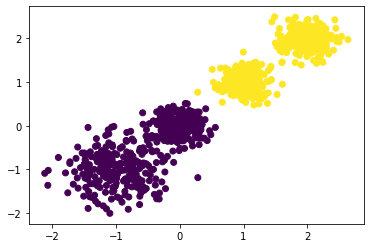

In [149]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### 3.3  提取新闻人物里的对话。(使用以上提取小数据即可）

提示：    
1.寻找预料里具有表示说的意思。    
2.使用语法分析提取句子结构。    
3.检测谓语是否有表示说的意思。